### Latent ideology of users

LI is based on the media outlet shared by each user, therefore the ideology reflects the group of media an user shares.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

np.random.seed(123459)

In [2]:
# Data with only columns of interest
data = pd.read_csv('Data/dataEchoChambers.csv', usecols=['tw_id', 'fecha', 'usr_id', 'opinion_dinamic', 'url_expanded', 'medio'])
data.head(n = 5)

,fecha,url_expanded,medio,opinion_dinamic,tw_id,usr_id
0,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101346910135377920,716295311342321665
1,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101346845589233665,271519704
2,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101350580142903296,987494618156675072
3,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101350441126936580,770375532
4,2019-03-01,https://www.clarin.com/politica/cristina-hijos...,Clarin,NaN,1101353444135370754,740350122974937088


### Encoding matrix user - media share
User - media shares dataframe based on one-hot encoding of media shares

In [3]:
user_media_df = pd.DataFrame()

# user_id column
user_media_df['usr_id'] = data['usr_id']

#creating instance of one-hot-encoder and one-hot encoding of media shares
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(data[['medio']]).toarray())
encoder_df.columns = list(encoder.categories_[0])

user_media_df = user_media_df.join(encoder_df)

In [4]:
user_media_df = user_media_df.groupby('usr_id').sum()
user_media_df.head(n = 5)

,Ambito Financiero,Clarin,Contexto,Diario Registrado,El Cronista,El Destape,El Dia,El Litoral,Infobae,Jornada,La Izquierda Diario,La Nacion,Minuto Uno,Pagina 12,Perfil,Radio Dos,Radio Mitre,TYC Sports,Todo Noticias
usr_id,,,,,,,,,,,,,,,,,,,
12864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
58613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59173,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
624143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
760916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
from scipy.stats import entropy

number_media_effective = user_media_df.apply(lambda x: 2**entropy(x, base = 2), axis = 1).to_list()

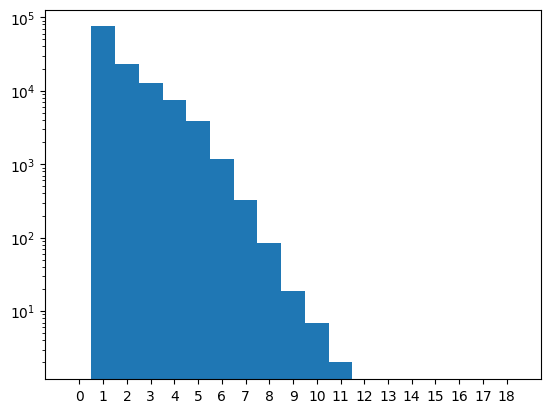

In [20]:
plt.hist(number_media_effective, bins = np.arange(-0.5, 19.5, 1))
plt.yscale('log')
plt.xticks(range(0, 19))
plt.show()

In [26]:
2**entropy([100, 30], base = 2)

1.7163572076839735

### Media share index

Correspondence analysis over the data of user - media share

In [5]:
# correspondence analysis function
def calculate_scores(A, it=15):
    P = (1/np.sum(A))*A #Nomalized natrix

    #Defining needings for standardizing
    n_col = np.shape(P)[1]
    n_row = np.shape(P)[0]
    r = np.matmul(P, np.ones((n_col,))) #rows
    c = np.matmul(np.ones((n_row,)), P) #columns
    r2 = r**(-0.5)
    c2 = c**(-0.5)
    Dr2 = np.diag(r2)
    Dc2 = np.diag(c2)
    r_t = np.array([r]).transpose()
    c_new = np.array([c])

    #Standardized residuals
    S = np.matmul(np.matmul(Dr2, P - np.matmul(r_t,c_new)),Dc2)
    #Truncated SVD
    #U, sig, Vt = randomized_svd(S, n_components=1, n_iter=it, random_state=None)

    #FULL SVD
    U, sig, Vt = np.linalg.svd(S, full_matrices=False)

    #scores
    X_dim1 = np.matmul(Dr2,U)[:,0] #scores matrix
    scores = (-1 + 2 * (X_dim1-np.min(X_dim1))/np.ptp(X_dim1)) #scaled
    return scores

#### Aplication over data

Preprocessing: we take the principal media outlets and those users that share at least two different principal media outlets

In [1]:
ppal_media = ['Clarin', 'La Nacion', 'Pagina 12', 'Todo Noticias', 'Infobae', 'El Destape']
ppal_media += ['Ambito Financiero', 'Minuto Uno', 'Perfil']#, 'El Cronista', 'El Dia', 'Radio Mitre']

user_media_df_filtrado = user_media_df[ppal_media].copy()

NameError: name 'user_media_df' is not defined

In [11]:
potential_users_msi_defined = user_media_df_filtrado[user_media_df_filtrado.apply(np.count_nonzero, axis = 1) > 0].shape[0]
print(potential_users_msi_defined)

120626


In [12]:
user_media_df_filtrado = user_media_df_filtrado[user_media_df_filtrado.apply(np.count_nonzero, axis = 1) > 2].copy()

In [13]:
user_media_df_filtrado.head(n = 5)

,Clarin,La Nacion,Pagina 12,Todo Noticias,Infobae,El Destape,Ambito Financiero,Minuto Uno,Perfil,El Cronista,El Dia,Radio Mitre
usr_id,,,,,,,,,,,,
59173,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
778189,3.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
794332,23.0,3.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
1160031,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1357911,8.0,9.0,6.0,0.0,6.0,11.0,8.0,1.0,1.0,3.0,3.0,0.0


In [14]:
# Amount of users involved in MSI 
user_media_df_filtrado.shape[0]

29120

#### Aplication of correspondence analysis over the matrix: 

In [15]:
# Matrix of user - media shared
A = user_media_df_filtrado.to_numpy()

# Aplication of the algorithm
score_users = calculate_scores(A)

### Result

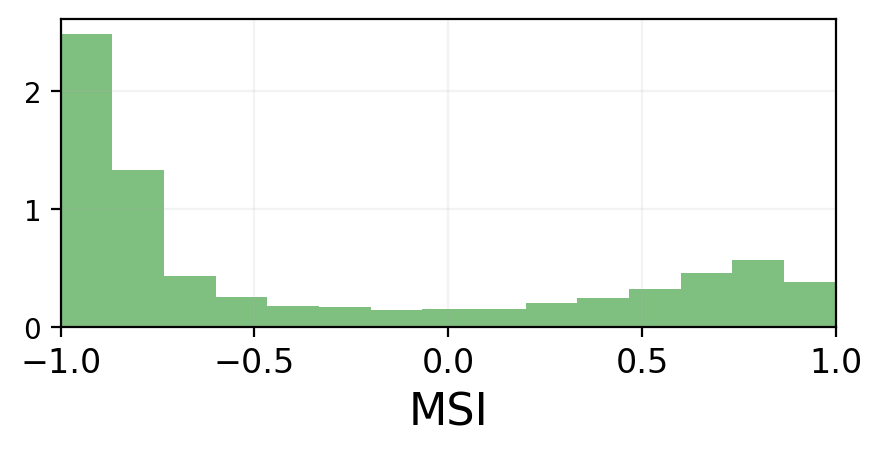

In [16]:
# Scores of the users
plt.figure(dpi = 200, figsize=(5,2))
plt.hist(score_users, bins = 15, range=(-1, 1), alpha = 0.50, color = 'g', density = True)
plt.xticks(np.arange(-1, 1.05, 0.50), size = 12)
plt.xlabel(r'MSI', size = 16)
plt.grid(True, alpha = 0.15)
plt.xlim([-1, 1])
plt.show()

In [17]:
user_media_df_filtrado['score'] = score_users

In [18]:
# Scores of the media
media_score = []
for media in user_media_df_filtrado.columns[:user_media_df_filtrado.shape[1]-1]:
    media_score.append([media, np.average(user_media_df_filtrado['score'], weights=user_media_df_filtrado[media])])

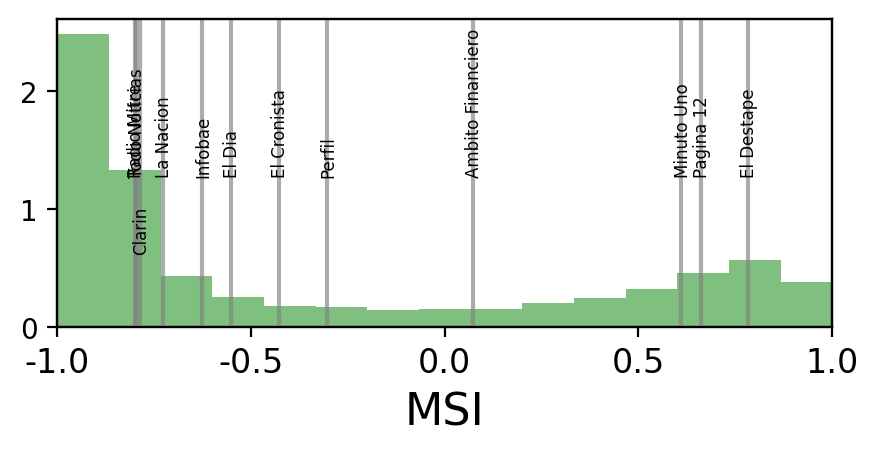

In [19]:
# Scores of the users
fig, ax = plt.subplots(dpi = 200, figsize=(5,2))
ax.hist(score_users, bins = 15, range=(-1, 1), alpha = 0.50, color = 'g', density = True)
ax.set_xlabel(r'MSI', size = 16)

ax2 = ax.twinx()
for ms in media_score:
    ax2.axvline(ms[1], color = 'grey', alpha = 0.65)
    if ms[0] != 'Clarin':
        ax2.text(x = ms[1]-0.02, y = 0.5, s=ms[0], rotation = 90, size = 6)
    else: 
        ax2.text(x = ms[1]-0.02, y = 0.25, s=ms[0], rotation = 90, size = 6)
ax2.set_yticks([])
ax.set_xticks(np.arange(-1, 1.05, 0.50), np.arange(-1, 1.05, 0.50), size = 12)
ax.set_xlim([-1, 1])
plt.show()

### Relation to opinion model 

The ideology of an user in the most frequent label assigned to it at the time of sharing a news.

In [20]:
from scipy.stats import mode 

user_ideology = data.groupby('usr_id').apply(lambda x: mode(x['opinion_dinamic'])[0][0])

ideology_of_msi_users = user_ideology[user_ideology.index.isin(user_media_df_filtrado.index)].to_list()

user_media_df_filtrado['ideology'] = ideology_of_msi_users

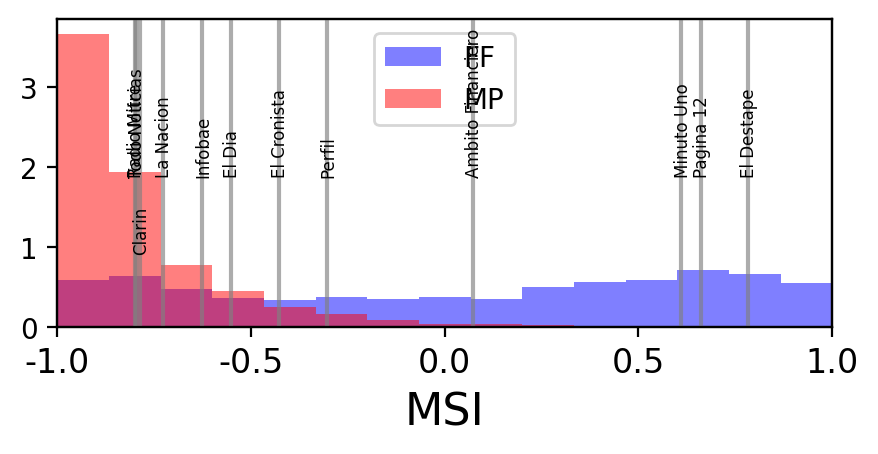

In [24]:
# Scores of the users
fig, ax = plt.subplots(dpi = 200, figsize=(5,2))

ideocolor = {'FF': 'b', 'MP': 'r'}
for ideology in ['FF', 'MP']:
    ax.hist(user_media_df_filtrado[user_media_df_filtrado['ideology'] == ideology]['score'], bins = 15, range=(-1, 1), alpha = 0.50, color = ideocolor[ideology], density = True, label = ideology)
ax.set_xlabel(r'MSI', size = 16)
ax.legend(loc = 'upper center')

ax2 = ax.twinx()
for ms in media_score:
    ax2.axvline(ms[1], color = 'grey', alpha = 0.65)
    if ms[0] != 'Clarin':
        ax2.text(x = ms[1]-0.02, y = 0.5, s=ms[0], rotation = 90, size = 6)
    else: 
        ax2.text(x = ms[1]-0.02, y = 0.25, s=ms[0], rotation = 90, size = 6)
ax2.set_yticks([])
    
    
ax2.set_yticks([])
ax.set_xticks(np.arange(-1, 1.05, 0.50), np.arange(-1, 1.05, 0.50), size = 12)
ax.set_xlim([-1, 1])
plt.show()

### Other way 

In [25]:
score_users_new = np.random.normal(loc = 0, scale = 1.00, size = A.shape[0])
score_users_new = (score_users_new - np.mean(score_users_new))/np.std(score_users_new)

for iteration in range(25):
    
    score_media_new = np.array([np.average(score_users_new, weights=A[:,i]) for i in range(A.shape[1])])
    score_users_new = np.array([np.average(score_media_new, weights=A[j,:]) for j in range(A.shape[0])])

    score_users_new = (score_users_new - np.mean(score_users_new))/np.std(score_users_new)

In [26]:
score_users_new = (-1 + 2 * (score_users_new-np.min(score_users_new))/np.ptp(score_users_new)) #scaled

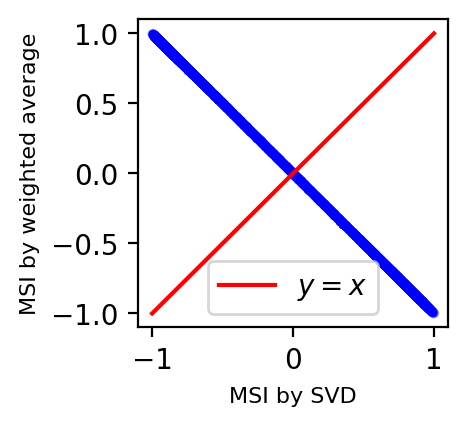

In [27]:
plt.figure(dpi = 200, figsize=(2,2))
plt.plot(score_users, score_users_new, marker = '.', alpha = 0.05, markersize = 5, color = 'b')
plt.plot([-1, 1], [-1, 1], label = r'$y = x$', color = 'r')
plt.legend(loc = 'best')
plt.xlabel('MSI by SVD', size = 8)
plt.ylabel('MSI by weighted average', size = 8)
plt.show()

In [28]:
score_media_new = np.array([np.average(score_users_new, weights=A[:,i]) for i in range(A.shape[1])])

Text(0.5, 1.0, "Media outlets' index")

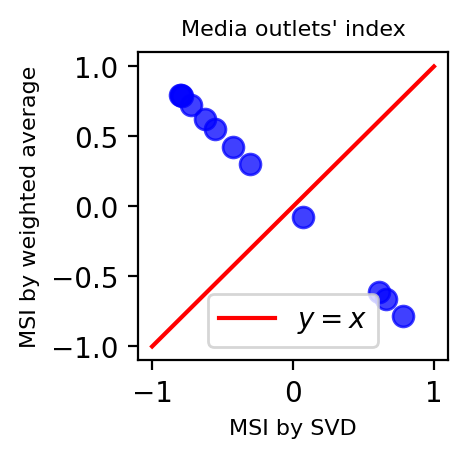

In [29]:
plt.figure(dpi = 200, figsize=(2,2))
plt.plot([m[1] for m in media_score], score_media_new, marker = '.', color = 'b', linewidth = 0, markersize = 15, alpha = 0.75)
plt.plot([-1, 1], [-1, 1], label = r'$y = x$', color = 'r')
plt.legend(loc = 'best')
plt.xlabel('MSI by SVD', size = 8)
plt.ylabel('MSI by weighted average', size = 8)
plt.title("Media outlets\' index", size = 8)

### Complete calculation 

In [30]:
#### Aplication over data
user_media_df_filtrado = user_media_df[ppal_media].copy()
user_media_df_filtrado = user_media_df_filtrado[user_media_df_filtrado.apply(np.count_nonzero, axis = 1) > 0].copy()

In [37]:
user_media_df_filtrado.shape

(120626, 12)

In [31]:
# Matrix of user - media shared
A = user_media_df_filtrado.to_numpy()

In [47]:
score_users_new = np.random.normal(loc = 0, scale = 1.00, size = A.shape[0])
score_users_new = (score_users_new - np.mean(score_users_new))/np.std(score_users_new)

for iteration in range(50):
    
    score_media_new = np.array([np.average(score_users_new, weights=A[:,i]) for i in range(A.shape[1])])
    score_users_new = np.array([np.average(score_media_new, weights=A[j,:]) for j in range(A.shape[0])])

    score_users_new = (score_users_new - np.mean(score_users_new))/np.std(score_users_new)
    print(score_media_new)

[ 0.0645311   0.01166714 -0.02529423 -0.0290706   0.03801155  0.0309223
 -0.22321114  0.01637646  0.01964683  0.07241334 -0.16728684  0.0209046 ]
[ 0.39819643  0.11771642 -0.286336   -0.170765    0.2605007   0.11623582
 -1.64601467 -0.02687347  0.0912306   0.24015376 -1.03733511  0.14848063]
[ 0.43531721  0.20837648 -0.44575956 -0.05817455  0.30945803 -0.04362381
 -1.7349989  -0.20521731  0.07272454  0.08232451 -0.85895337  0.25496678]
[ 0.52116455  0.33368459 -0.73453764  0.13940751  0.37447759 -0.38938854
 -1.73271603 -0.51753434  0.03966325 -0.01127768 -0.58464542  0.4774935 ]
[ 0.61394341  0.46361517 -1.08489671  0.38955828  0.42816028 -0.88061835
 -1.49865354 -0.90856243 -0.00293925 -0.02260769 -0.2181888   0.7852987 ]
[ 0.64136949  0.5252235  -1.28665251  0.55594065  0.43294095 -1.23947354
 -1.1097231  -1.15801038 -0.03373362  0.02159553  0.07898479  1.00534006]
[ 0.63141893  0.53586479 -1.34619396  0.61841011  0.41800593 -1.39566779
 -0.82643311 -1.24839432 -0.04640282  0.064529

In [48]:
#score_users = (-1 + 2 * (score_users_new-np.min(score_users_new))/np.ptp(score_users_new)) #scaled
score_users = score_users_new

In [49]:
score_media = np.array([np.average(score_users, weights=A[:,i]) for i in range(A.shape[1])])
media_score = [[user_media_df_filtrado.columns[i], score_media[i]] for i in range(len(score_media))]
print(media_score)

[['Clarin', 0.6096726620909291], ['La Nacion', 0.5312967947059127], ['Pagina 12', -1.362657954624947], ['Todo Noticias', 0.6419805670666031], ['Infobae', 0.3985176619135223], ['El Destape', -1.4959639082725191], ['Ambito Financiero', -0.5587327287896957], ['Minuto Uno', -1.2912973343353134], ['Perfil', -0.05069960292704401], ['El Cronista', 0.11571608521246778], ['El Dia', 0.30968828254836456], ['Radio Mitre', 1.3220481456239286]]


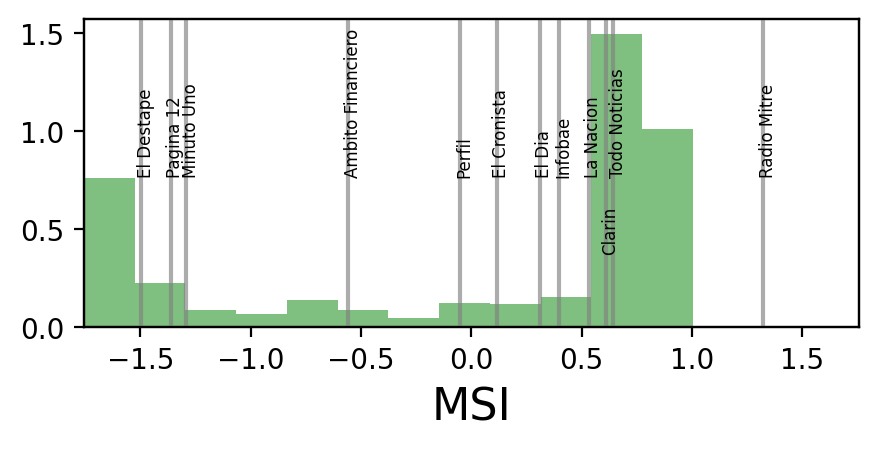

In [59]:
# Scores of the users
fig, ax = plt.subplots(dpi = 200, figsize=(5,2))
#ax.hist(score_users, bins = 15, range=(-1, 1), alpha = 0.50, color = 'g', density = True)
ax.hist(score_users, bins = 15, alpha = 0.50, color = 'g', density = True)
ax.set_xlabel(r'MSI', size = 16)

ax2 = ax.twinx()
for ms in media_score:
    ax2.axvline(ms[1], color = 'grey', alpha = 0.65)
    if ms[0] != 'Clarin':
        ax2.text(x = ms[1]-0.02, y = 0.5, s=ms[0], rotation = 90, size = 6)
    else: 
        ax2.text(x = ms[1]-0.02, y = 0.25, s=ms[0], rotation = 90, size = 6)
ax2.set_yticks([])
#ax.set_xticks(np.arange(-1, 1.05, 0.50), np.arange(-1, 1.05, 0.50), size = 12)
ax.set_xlim([-np.abs(user_media_df_filtrado['score']).max(), np.abs(user_media_df_filtrado['score']).max()])
plt.show()

In [53]:
user_media_df_filtrado['score'] = score_users

In [54]:
user_ideology = data.groupby('usr_id').apply(lambda x: mode(x['opinion_dinamic'])[0][0])

ideology_of_msi_users = user_ideology[user_ideology.index.isin(user_media_df_filtrado.index)].to_list()

user_media_df_filtrado['ideology'] = ideology_of_msi_users

/tmp/ipykernel_452828/1529206485.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  user_ideology = data.groupby('usr_id').apply(lambda x: mode(x['opinion_dinamic'])[0][0])
/tmp/ipykernel_452828/1529206485.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  user_ideology = data.groupby('usr_id').apply(lambda x: mode(x['opinion_dinamic'])[0][0])


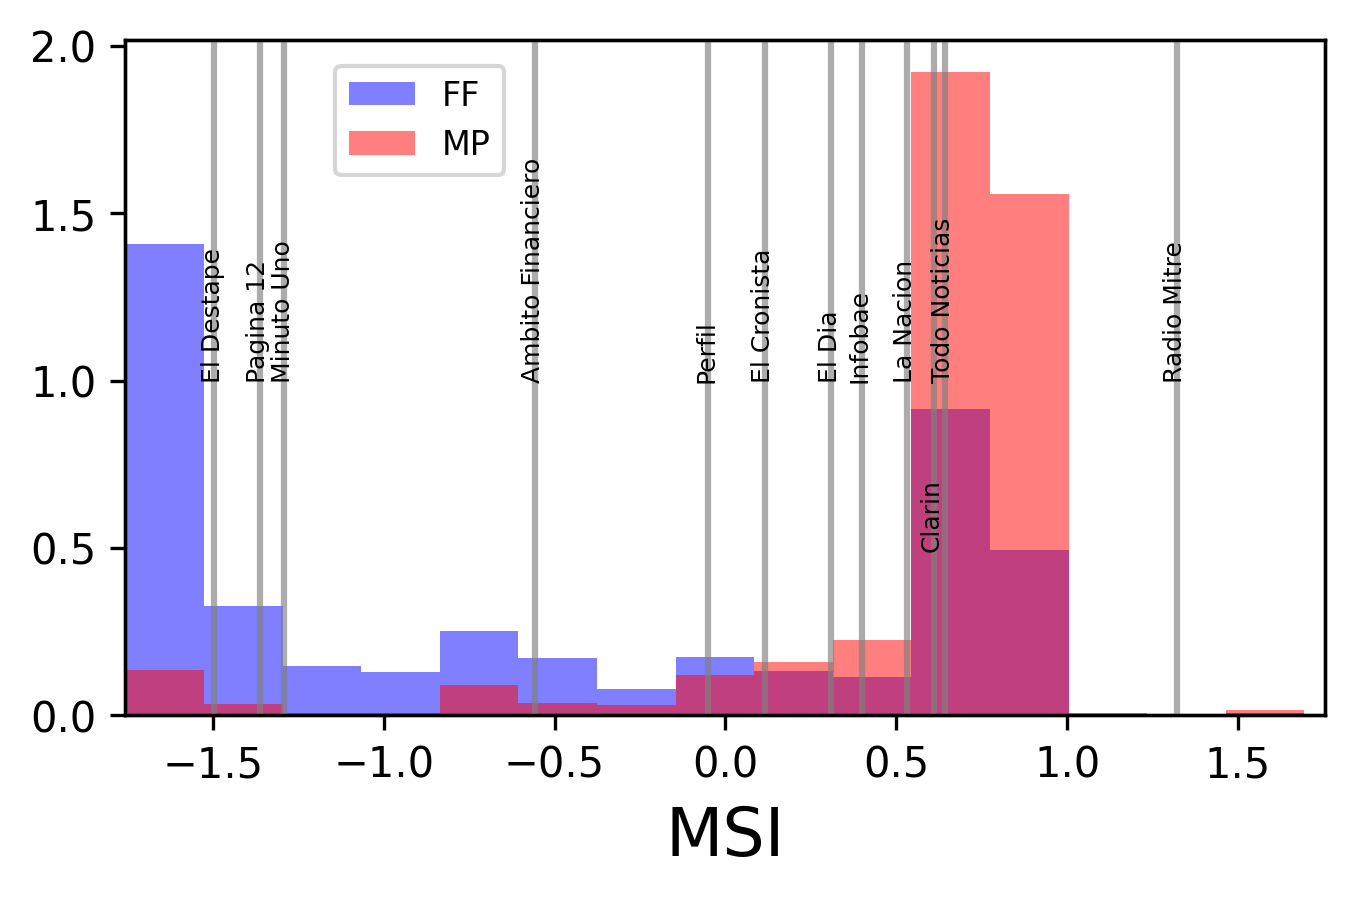

In [58]:
# Scores of the users
fig, ax = plt.subplots(dpi = 300, figsize=(5,3))
ax.set_position([0.10, 0.20, 0.80, 0.75])

ideocolor = {'FF': 'b', 'MP': 'r'}
for ideology in ['FF', 'MP']:
    #ax.hist(user_media_df_filtrado[user_media_df_filtrado['ideology'] == ideology]['score'], bins = 15, range=(-1, 1), alpha = 0.50, color = ideocolor[ideology], density = True, label = ideology)
    ax.hist(user_media_df_filtrado[user_media_df_filtrado['ideology'] == ideology]['score'], bins = 15, alpha = 0.50, color = ideocolor[ideology], density = True, label = ideology)
ax.set_xlabel(r'MSI', size = 16)
ax.legend(loc = (0.175, 0.80), fontsize = 8)

ax2 = ax.twinx()
ax2.set_position([0.10, 0.20, 0.80, 0.75])

for ms in media_score:
    ax2.axvline(ms[1], color = 'grey', alpha = 0.65)
    if ms[0] != 'Clarin':
        ax2.text(x = ms[1]-0.04, y = 0.5, s=ms[0], rotation = 90, size = 6)
    else: 
        ax2.text(x = ms[1]-0.04, y = 0.25, s=ms[0], rotation = 90, size = 6)
ax2.set_yticks([])
    
    
ax2.set_yticks([])
#ax.set_xticks(np.arange(-1, 1.05, 0.50), np.arange(-1, 1.05, 0.50), size = 12)
ax.set_xlim([-np.abs(user_media_df_filtrado['score']).max(), np.abs(user_media_df_filtrado['score']).max()])
plt.savefig('Results/MSI.png')
plt.show()

### Ideology gradient (to check)

In [ ]:
user_ideology_gradient = data.dropna(subset=['opinion_dinamic'])[['opinion_dinamic', 'usr_id']]
user_ideology_gradient['ideology_score'] = user_ideology_gradient.apply(lambda x: 1 if x['opinion_dinamic'] == 'MP' else -1, axis = 1)

ideology_gradient = user_ideology_gradient.groupby('usr_id').mean(numeric_only = True)

user_ideology_gradient = user_media_df_filtrado.merge(ideology_gradient, left_index=True, right_index=True)[['score', 'ideology_score']]

In [ ]:
plt.figure(dpi = 200, figsize=(2,2))
plt.plot(user_ideology_gradient['score'], user_ideology_gradient['ideology_score'], marker = '.', color = 'b', linewidth = 0, markersize = 5, alpha = 0.05)
#plt.plot([-1, 1], [-1, 1], label = r'$y = x$', color = 'r')
#plt.legend(loc = 'best')
#plt.xlabel('MSI by SVD', size = 8)
#plt.ylabel('MSI by weighted average', size = 8)
#plt.title("Media outlets\' index", size = 8)
plt.show()

In [ ]:
user_ideology_gradient.corr(method='spearman')

### Output

In [ ]:
user_media_df_filtrado['score'].to_csv('Results/MSI_users_score_with_1outletshared.csv')